In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

# Загрузка и предварительная обработка данных 

In [2]:
data = pd.read_excel('./data/company.xlsx')

In [3]:
data.head()

,ID,Дата регистрации,Вид деятельности,Размер компании,"Уставный капитал, млн RUB","Налоги, млн RUB","Страховые взносы в ПФР, млн RUB","Страховые взносы в ФОМС, млн RUB","Страховые взносы в ФСС, млн RUB","Основные средства , млн RUB","Чистые активы, млн RUB","Запасы, млн RUB","Выручка, млн RUB","Чистая прибыль (убыток), млн RUB",Среднесписочная численность работников,"Оплата труда, млн RUB"
0,1-2CN8JI,1997-03-06,Ремонт и техническое обслуживание летательных ...,Крупные предприятия,354.58,NaN,NaN,NaN,NaN,390.0,1529,1539.0,2322,518.0,251 - 500,469
1,1-1ESSMI0W,1995-05-25,Деятельность больничных организаций,Крупные предприятия,0.17,390.0,279.0,77.0,9.0,1824.0,2847,116.0,3373,245.0,1202,1912
2,1-OZWLA,1993-03-04,Научные исследования и разработки в области ес...,Средние предприятия,0.06,NaN,NaN,NaN,NaN,1305.0,1515,745.0,1181,5.0,875,577
3,1-BD0B7,1997-04-16,Торговля розничная одеждой в специализированны...,Крупные предприятия,9.01,743.0,209.0,50.0,NaN,35.0,7312,3470.0,10012,585.0,2035,1259
4,1-MDDDW,1994-08-24,"Перевозка воздушным пассажирским транспортом, ...",Крупные предприятия,918.90,NaN,NaN,NaN,NaN,3747.0,7362,6557.0,114517,1648.0,> 5 000,12725


In [4]:
data = data.set_index(['ID'])

In [5]:
#размер компании сильно коррелирует с выручкой компании
#Вид деятельности -очень вариативный показатель, пока удалим так как есть опасения в сложностях дальнейшего масштабирования мобели
#Планирую в последствии реализовать механизм предобработки признака по видам деятельности
data.drop(['Вид деятельности', 'Размер компании', 'Дата регистрации'], axis='columns', inplace=True)

In [6]:
data.head()

,"Уставный капитал, млн RUB","Налоги, млн RUB","Страховые взносы в ПФР, млн RUB","Страховые взносы в ФОМС, млн RUB","Страховые взносы в ФСС, млн RUB","Основные средства , млн RUB","Чистые активы, млн RUB","Запасы, млн RUB","Выручка, млн RUB","Чистая прибыль (убыток), млн RUB",Среднесписочная численность работников,"Оплата труда, млн RUB"
ID,,,,,,,,,,,,
1-2CN8JI,354.58,NaN,NaN,NaN,NaN,390.0,1529,1539.0,2322,518.0,251 - 500,469
1-1ESSMI0W,0.17,390.0,279.0,77.0,9.0,1824.0,2847,116.0,3373,245.0,1202,1912
1-OZWLA,0.06,NaN,NaN,NaN,NaN,1305.0,1515,745.0,1181,5.0,875,577
1-BD0B7,9.01,743.0,209.0,50.0,NaN,35.0,7312,3470.0,10012,585.0,2035,1259
1-MDDDW,918.90,NaN,NaN,NaN,NaN,3747.0,7362,6557.0,114517,1648.0,> 5 000,12725


In [7]:
data.shape

(354, 12)

In [8]:
data.describe()

,"Уставный капитал, млн RUB","Налоги, млн RUB","Страховые взносы в ПФР, млн RUB","Страховые взносы в ФОМС, млн RUB","Страховые взносы в ФСС, млн RUB","Основные средства , млн RUB","Чистые активы, млн RUB","Запасы, млн RUB","Выручка, млн RUB","Чистая прибыль (убыток), млн RUB","Оплата труда, млн RUB"
count,354.000000,219.000000,219.000000,219.000000,199.000000,352.000000,354.000000,350.000000,3.540000e+02,353.000000,354.000000
mean,3631.314237,542.374429,153.872146,44.105023,5.904523,7477.903409,9687.426554,2492.577143,1.850670e+04,834.467422,2062.983051
std,25354.505264,1024.778815,215.911068,56.235032,12.023375,29896.097929,41433.184453,7613.135442,6.589110e+04,4742.006692,6407.350212
min,0.000000,60.000000,19.000000,4.000000,0.000000,0.000000,-13777.000000,0.000000,8.070000e+02,-52138.000000,401.000000
25%,0.100000,207.000000,76.000000,22.000000,1.000000,100.750000,363.250000,83.250000,2.038250e+03,29.000000,554.750000
50%,9.175000,334.000000,110.000000,31.000000,3.000000,540.000000,1378.000000,599.000000,4.636000e+03,150.000000,836.000000
75%,456.857500,554.000000,164.500000,44.500000,5.500000,2782.000000,4278.500000,1993.500000,1.130100e+04,612.000000,1452.500000
max,436721.010000,14075.000000,2702.000000,668.000000,113.000000,339088.000000,594111.000000,92835.000000,1.035979e+06,40430.000000,81766.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 1-2CN8JI to 1-PAC1R
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Уставный капитал, млн RUB               354 non-null    float64
 1   Налоги, млн RUB                         219 non-null    float64
 2   Страховые взносы в ПФР, млн RUB         219 non-null    float64
 3   Страховые взносы в ФОМС, млн RUB        219 non-null    float64
 4   Страховые взносы в ФСС, млн RUB         199 non-null    float64
 5   Основные средства , млн RUB             352 non-null    float64
 6   Чистые активы, млн RUB                  354 non-null    int64  
 7   Запасы, млн RUB                         350 non-null    float64
 8   Выручка, млн RUB                        354 non-null    int64  
 9   Чистая прибыль (убыток), млн RUB        353 non-null    float64
 10  Среднесписочная численность работников  319 non-null    

In [10]:
# Проверяем количество пропусков
pd.isnull(data).sum()

Уставный капитал, млн RUB                   0
Налоги, млн RUB                           135
Страховые взносы в ПФР, млн RUB           135
Страховые взносы в ФОМС, млн RUB          135
Страховые взносы в ФСС, млн RUB           155
Основные средства , млн RUB                 2
Чистые активы, млн RUB                      0
Запасы, млн RUB                             4
Выручка, млн RUB                            0
Чистая прибыль (убыток), млн RUB            1
Среднесписочная численность работников     35
Оплата труда, млн RUB                       0
dtype: int64

## Обработка пропусков

Заполним пропущенные данные медианными значениями

In [11]:
data = data.fillna(data.median(axis=0), axis=0)

In [12]:
data.count(axis=0)

Уставный капитал, млн RUB                 354
Налоги, млн RUB                           354
Страховые взносы в ПФР, млн RUB           354
Страховые взносы в ФОМС, млн RUB          354
Страховые взносы в ФСС, млн RUB           354
Основные средства , млн RUB               354
Чистые активы, млн RUB                    354
Запасы, млн RUB                           354
Выручка, млн RUB                          354
Чистая прибыль (убыток), млн RUB          354
Среднесписочная численность работников    319
Оплата труда, млн RUB                     354
dtype: int64

In [13]:
pd.isnull(data).sum()

Уставный капитал, млн RUB                  0
Налоги, млн RUB                            0
Страховые взносы в ПФР, млн RUB            0
Страховые взносы в ФОМС, млн RUB           0
Страховые взносы в ФСС, млн RUB            0
Основные средства , млн RUB                0
Чистые активы, млн RUB                     0
Запасы, млн RUB                            0
Выручка, млн RUB                           0
Чистая прибыль (убыток), млн RUB           0
Среднесписочная численность работников    35
Оплата труда, млн RUB                      0
dtype: int64

На первом этапе стоит задача в предсказании фода оплаты труда, в качестве эксперимента попробуем выполнить задачу без информации и среднесписочной численности сотрудников

In [14]:
del data['Среднесписочная численность работников']

In [15]:
#анализируем типы данных в разрезе признаков
data.dtypes.value_counts()

float64    8
int64      3
dtype: int64

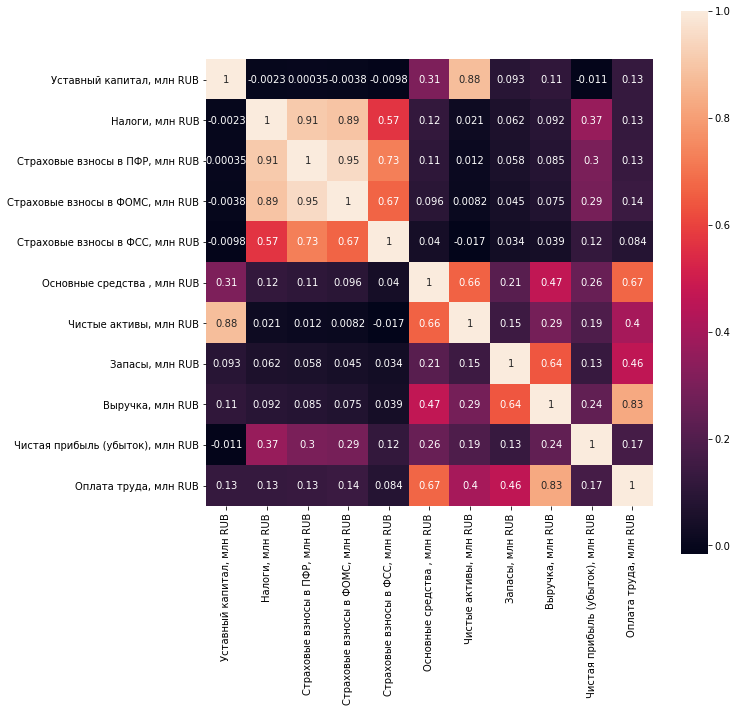

In [16]:
#строим матрицу корреляции
plt.subplots(figsize=(10, 10))
sn.heatmap(data.corr(), square=True, annot=True)
plt.show()

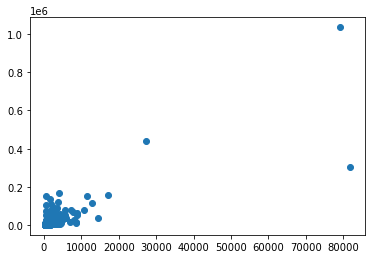

In [17]:
# построим график зависимости ФОТ и выручки(наибольшая корреляция)
plt.scatter(data['Оплата труда, млн RUB'], data['Выручка, млн RUB'])
plt.show()

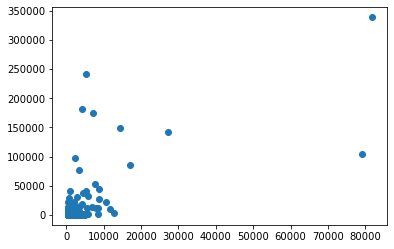

In [18]:
plt.scatter(data['Оплата труда, млн RUB'], data['Основные средства , млн RUB'])
plt.show()

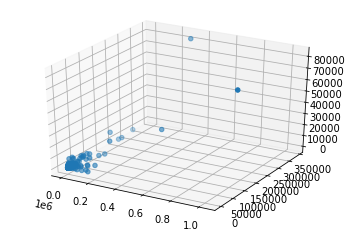

In [19]:
# Отобразим зависимость на трехмерном графике
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Выручка, млн RUB'], data['Основные средства , млн RUB'], data['Оплата труда, млн RUB'])
plt.show()

# Обучение

In [25]:
df = data.copy()

In [26]:
y = df['Оплата труда, млн RUB']

In [27]:
df['ones'] = 1

In [28]:
X = df.drop(['Оплата труда, млн RUB'], axis=1)

In [29]:
#X = np.array(X)
#y = np.array(y)

In [30]:
len(X)

354

In [31]:
#функция для выисления доли треновочной выбрки
#def get_partTrain(n):
#    Ntrain = n*354//100
#    return Ntrain

#Ntrain = get_partTrain(30)

In [32]:
#разбиваем данные на тестовую и тренировочную выборки

#X_test, y_test = X[:Ntrain], y[:Ntrain]
#X_train, y_train = X[Ntrain:], y[Ntrain:]

## Линейная регрессия

In [33]:
# Построим прогноз с помощью линейной регрессии
def lin_reg(X, y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(y) )
    y_pred = X.dot(w)
    return y_pred

In [34]:
y_pred = lin_reg(X, y)

In [35]:
# коэффициент детерминации
def get_r2(y, y_pred):
    d1 = y - y_pred
    d2 = y - y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [36]:
# вычислим коэффициент детерминации
r2 = get_r2(y, y_pred)
print("r2:", r2)

r2: 0.8328990744222866


In [37]:
#проверим на тестовой выборке
#y_pred = lin_reg(X_test, y_test)
#r2 = get_r2(y_test, y_pred)
#print("r2:", r2)

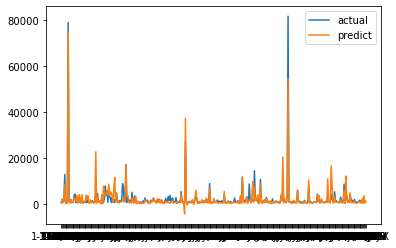

In [38]:
# сравним фактические данные с предсказанными
plt.plot(y, label='actual')
plt.plot(y_pred, label='predict')
plt.legend()
plt.show()

### L2 регуляризация

Так как данные имеют выбросы попробуем улучшить результат предсказаний с помощью L2 регуляризации

In [39]:
# Построим прогноз с помощью линейной регрессии с L2 регуляризацией
def lin_reg_L2(X, y):
    l2 = 1000.0
    w = np.linalg.solve(l2*np.eye(11) + X.T.dot(X), X.T.dot(y) )
    y_pred = X.dot(w)
    return y_pred

In [40]:
y_pred = lin_reg_L2(X, y)

In [41]:
def get_r2(y, y_pred):
    d1 = y - y_pred
    d2 = y - y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [42]:
# вычислим коэффициент детерминации на тренирочной выборке
r2 = get_r2(y, y_pred)
print("r2:", r2)

r2: 0.8322351628846525


In [43]:
#проверим на тестовой выборке
#y_pred = lin_reg_L2(X_test, y_test)
#r2 = get_r2(y_test, y_pred)
#print("r2:", r2)

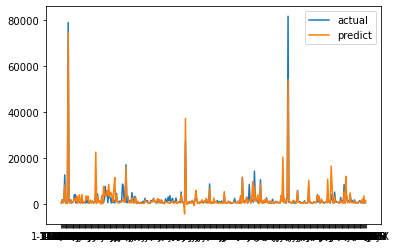

In [44]:
# сравним фактические данные с предсказанными
plt.plot(y, label='actual')
plt.plot(y_pred, label='predict')
plt.legend()
plt.show()

Результат предсказани без регуляризации оказался немного лучше чем после применения L2

In [50]:
predict_data = data.copy()

In [56]:
predict_data['Оплата труда, прогноз'] = y_pred.astype('int')

In [57]:
predict_data.reset_index(level=0, inplace=True)

In [58]:
predict_data.head(5)

,ID,"Уставный капитал, млн RUB","Налоги, млн RUB","Страховые взносы в ПФР, млн RUB","Страховые взносы в ФОМС, млн RUB","Страховые взносы в ФСС, млн RUB","Основные средства , млн RUB","Чистые активы, млн RUB","Запасы, млн RUB","Выручка, млн RUB","Чистая прибыль (убыток), млн RUB","Оплата труда, млн RUB","Оплата труда, прогноз"
0,1-2CN8JI,354.58,334.0,110.0,31.0,3.0,390.0,1529,1539.0,2322,518.0,469,481
1,1-1ESSMI0W,0.17,390.0,279.0,77.0,9.0,1824.0,2847,116.0,3373,245.0,1912,1483
2,1-OZWLA,0.06,334.0,110.0,31.0,3.0,1305.0,1515,745.0,1181,5.0,577,643
3,1-BD0B7,9.01,743.0,209.0,50.0,3.0,35.0,7312,3470.0,10012,585.0,1259,1658
4,1-MDDDW,918.90,334.0,110.0,31.0,3.0,3747.0,7362,6557.0,114517,1648.0,12725,8343


In [61]:
predict_data.to_csv('./data/predict_data.csv')